In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np
import pandas as pd
import gradio

In [2]:
labels = ['PNEUMONIA', 'NORMAL'] 
img_size = 150
def get_data(data_dir):
  data= []
  for label in labels:
    path = os.path.join(data_dir,label)
    class_num = labels.index(label)
    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        resized_arr = cv2.resize(img_arr, (img_size,img_size))
        data.append([resized_arr,class_num])
      except Exception as e:
        print(e)
  return np.array(data)

In [6]:
train = get_data("chest_xray\\chest_xray\\train")
test = get_data("chest_xray\\chest_xray\\test")
val = get_data("chest_xray\\chest_xray\\val")

#print(train.shape)

OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



C:\Users\DELL\AppData\Local\Temp\ipykernel_17616\1133399680.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [7]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature , label in train:
  x_train.append(feature)
  y_train.append(label)

for feature , label in test:
  x_test.append(feature)
  y_test.append(label)

for feature , label in val:
  x_val.append(feature)
  y_val.append(label)


In [8]:
positives=[]
negatives=[]
for i in range(len(y_train)):
  if y_train[i]:
    positives.append(x_train[i])
  else:
    negatives.append(x_train[i])



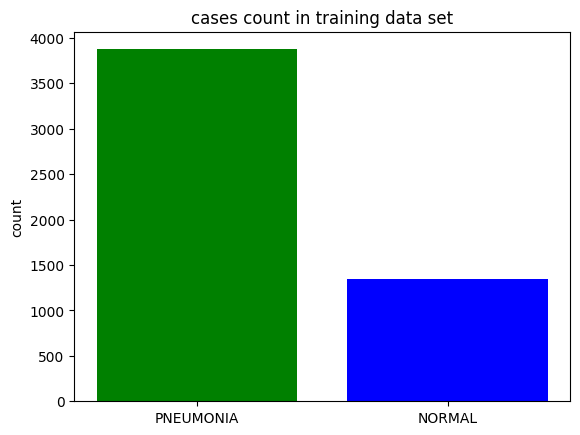

In [9]:
plt.bar(labels,[len(negatives),len(positives)] , color=["green" , "blue"])
plt.title("cases count in training data set")
plt.ylabel("count")
plt.show()

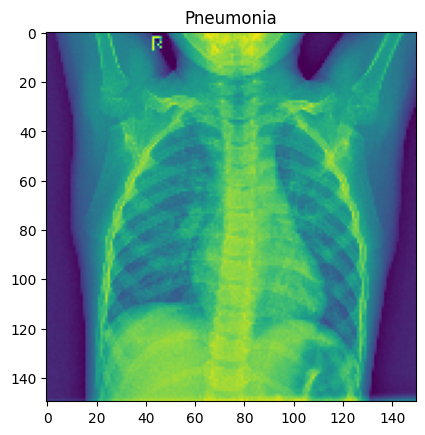

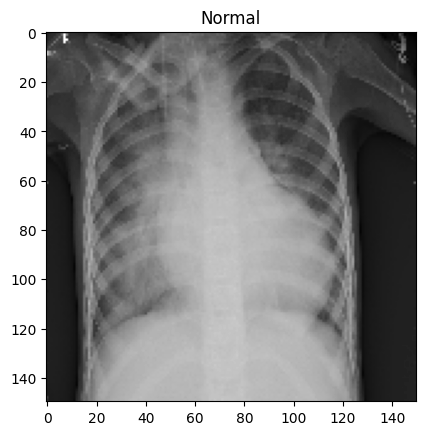

In [10]:
plt.imshow(positives[0])
plt.title("Pneumonia")
plt.show()

plt.imshow(negatives[4],cmap="gray")
plt.title("Normal")
plt.show()

In [11]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [12]:
x_train = x_train.reshape(-1, img_size,img_size,1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size,img_size,1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size,img_size,1)
y_test = np.array(y_test)

In [13]:
x_test[0].shape

(150, 150, 1)

In [14]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.2, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip = True,  # randomly flip images
    vertical_flip=False
)

datagen.fit(x_train)

In [16]:
model = Sequential()
model.add(Conv2D(32,(3,3),strides =1 ,padding = 'same' , activation = 'relu', input_shape =(150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) ,strides=2,padding='same'))

model.add(Conv2D(64,(3,3),strides =1 ,padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) ,strides=2,padding='same'))

model.add(Conv2D(64,(3,3),strides =1 ,padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) ,strides=2,padding='same'))

model.add(Conv2D(128,(3,3),strides =1 ,padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) ,strides=2,padding='same'))

model.add(Conv2D(256,(3,3),strides =1 ,padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) ,strides=2,padding='same'))

model.add(Flatten())
model.add(Dense(units=128 , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1 , activation='sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy',metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [17]:
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy',metrics = ['accuracy'])

In [18]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.3,
                                            min_lr=0.000001)

In [20]:
history = model.fit(datagen.flow(x_train,y_train,batch_size=32),
                    epochs=3,
                    validation_data=datagen.flow(x_val,y_val),
                    callbacks= learning_rate_reduction)

Epoch 1/3
163/163 [==============================] - 407s 2s/step - loss: 0.3466 - accuracy: 0.8570 - val_loss: 5.8502 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/3
163/163 [==============================] - 375s 2s/step - loss: 0.2627 - accuracy: 0.9028 - val_loss: 47.2699 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/3
163/163 [==============================] - ETA: 0s - loss: 0.2316 - accuracy: 0.9164
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 504s 3s/step - loss: 0.2316 - accuracy: 0.9164 - val_loss: 30.0019 - val_accuracy: 0.5000 - lr: 0.0010


In [21]:
model.save_weights('pneumoniadetection')

In [22]:
print("Loss of the model is - ", model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - ",model.evaluate(x_test,y_test)[1]*100,"%")

20/20 [==============================] - 17s 825ms/step - loss: 8.0462 - accuracy: 0.6250
Loss of the model is -  8.046228408813477
20/20 [==============================] - 15s 750ms/step - loss: 8.0462 - accuracy: 0.6250
Accuracy of the model is -  62.5 %


In [ ]:
epochs = list(range(10))
fig ,ax = plt.subplots(1,2)
train_acc = history.history['accuarcy']
train_loss = history.history['loss']
val_acc = history.history['val_accuarcy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs,train_acc , 'go-',label="Training Accuracy")
ax[0].plot(epochs,val_acc , 'ro-',label="Validation Accuracy")
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs,train_acc , 'g-o',label="Training Accuracy")
ax[1].plot(epochs,val_acc , 'r-o',label="Validation Accuracy")
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [25]:
predictions = model.predict(x_test)
for i in range(len(predictions)):
  predictions[i] = 1 if predictions[i]>0.5 else 0
  

20/20 [==============================] - 16s 776ms/step


In [26]:
print(classification_report(y_test,predictions,target_names = ['Pneumoia (Class 0)','Normal (Class 1)']))

                    precision    recall  f1-score   support

Pneumoia (Class 0)       0.62      1.00      0.77       390
  Normal (Class 1)       0.00      0.00      0.00       234

          accuracy                           0.62       624
         macro avg       0.31      0.50      0.38       624
      weighted avg       0.39      0.62      0.48       624



C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
cm = confusion_matrix(y_test,predictions)
cm = pd.DataFrame(cm,index = ['0','1'],columns = ['0','1'])
cm

,0,1
0,390,0
1,234,0


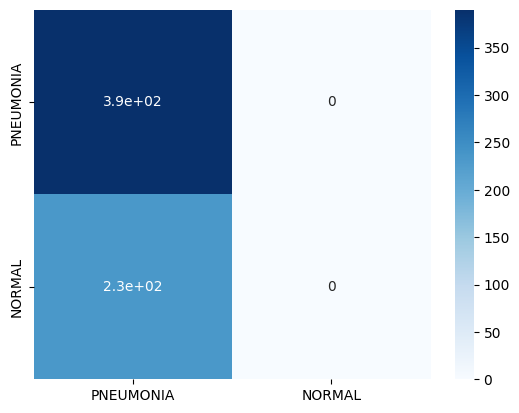

In [28]:
sns.heatmap(cm,cmap='Blues',annot=True,xticklabels = labels,yticklabels = labels)
plt.show()

In [29]:
def pneumoniaPrediction(img):
  img = np.array(img) / 255
  img = img.reshape(-1,150,150,1)
  isPneumonic = model.predict(img)[0]
  imgClass = "Normal" if isPneumonic<0.5 else "Pneumonic"
  return imgClass

In [30]:
pr = model.predict(x_test)
for i in range(len(pr)):
  if pr[i]>0.5:
    pr[i]=1
  else:
    pr[i]=0

20/20 [==============================] - 15s 736ms/step


In [ ]:
img = gradio.inputs.Image(shape=(150,150))
label = gradio.outputs.Label(num_top_classes=1)

In [ ]:
interface = gradio.Interface(fn = pneumoniaPrediction,
                             title = 'Pneumonia Detection using Chest X-Ray',
                             inputs = img,
                             outputs = label,
                             interpretation = "default")
interface.launch(debug=True, share=True)